# Homework 04: Training Methods

### <p style="text-align: right;"> &#9989; Behrendt, Michael

<!-- <img src="./training_models.jpeg" 
     alt="Palmer Penguins" 
     style="width: 600px; height: auto;"> -->
![image](./training_models.jpeg)

____

## Problem 1: Chapter 4 (12 points)

Read Chapter 4 very carefully, then answer these questions 

For this problem **DO NOT USE** AI of any kind.

Once you have read Chapater 4, open three markdown cells below and put your answers to questions 8, 10 and 11 at the end of the chapter. Be as detailed as you can. Justify all of your answers. 

**🗒️ Question:** Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?



✏️ **Answer:** 
When there is a large gap between the training and validation error, that indicates the system is only valid for the training data; in other words, the system is overfitting the training data.

**🗒️ Question:** Why would you want to use:

1. Ridge regression instead of plain linear regression (*i.e.* without any regularization)?
2. Lasso instead of ridge regression?
3. Elastic net instead of lasso regression?


✏️ **Answer:** 
1. Ridge regression can be used over linear regression when it is necessary to bring a noisy set of data closer to the mean.
2. Lasso regression can be used over ridge regression when it is expected that many of the features are irrelevant or not correlated with the target output.
3. Elastic net can be used over lasso regression when there are many irrelevant values (preempting ridge regression) and necessary to bring a noisy set of data closer to the mean.

**🗒️ Question:** Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?

✏️ **Answer:** 
Softmax is multiclass, not multioutput, so it can only identify one possible output. In this case, two logistic regression classifiers should be used.

____ 

## Problem 2: Regularization Paths (15 points)

**🗒️ Task:** Follow these steps to explore regularization:
* create a synthetic regression dataset 
* fit Ridge, LASSO and ElasticNet for varying regularization strengths
* extract the weights and plot them versus the regularization parameter value

If you want a little starter code, here is some:

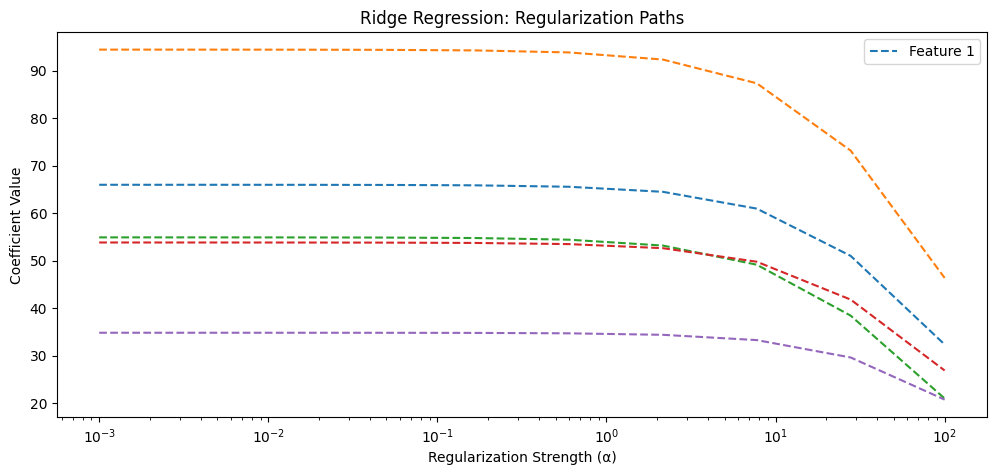

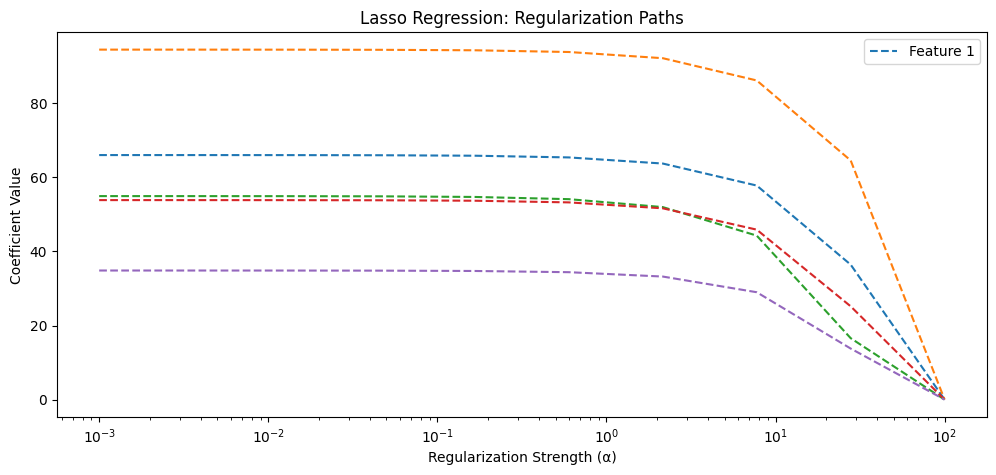

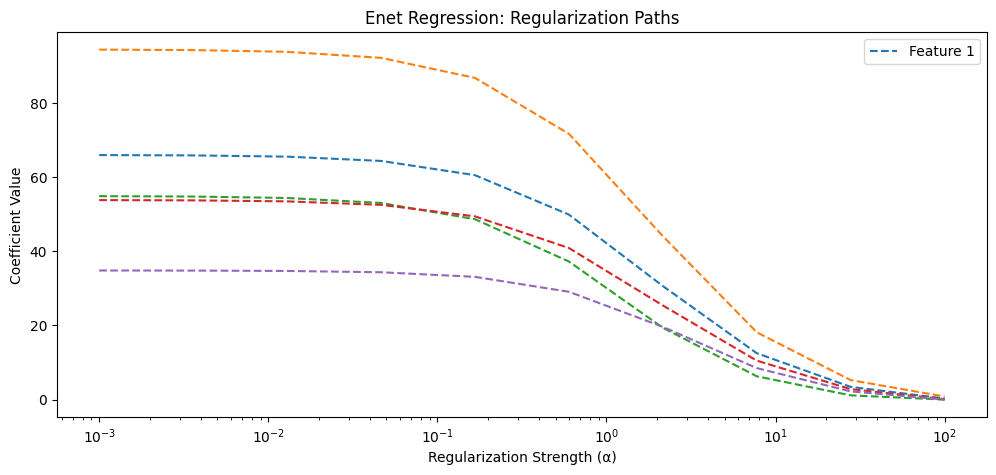

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize features

alphas = np.logspace(-3, 2, 10)  # Range of regularization strengths

# Initialize storage for coefficient paths
coefs_ridge, coefs_lasso, coefs_enet = [], [], []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X, y)
    lasso = Lasso(alpha=alpha).fit(X, y)
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5).fit(X, y)
    
    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)
    coefs_enet.append(enet.coef_)

# Convert to arrays for plotting
coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)
coefs_enet = np.array(coefs_enet)

# Plot regularization paths
plt.figure(figsize=(12, 5))
for i in range(X.shape[1]):  # Iterate over features
    plt.plot(alphas, coefs_ridge[:, i], linestyle="dashed", label=f"Feature {i+1}" if i == 0 else "")
plt.xscale("log")
plt.xlabel("Regularization Strength (α)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression: Regularization Paths")
plt.legend()

# Plot regularization paths
plt.figure(figsize=(12, 5))
for i in range(X.shape[1]):  # Iterate over features
    plt.plot(alphas, coefs_lasso[:, i], linestyle="dashed", label=f"Feature {i+1}" if i == 0 else "")
plt.xscale("log")
plt.xlabel("Regularization Strength (α)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression: Regularization Paths")
plt.legend()

# Plot regularization paths
plt.figure(figsize=(12, 5))
for i in range(X.shape[1]):  # Iterate over features
    plt.plot(alphas, coefs_enet[:, i], linestyle="dashed", label=f"Feature {i+1}" if i == 0 else "")
plt.xscale("log")
plt.xlabel("Regularization Strength (α)")
plt.ylabel("Coefficient Value")
plt.title("Enet Regression: Regularization Paths")
plt.legend()

**🗒️ Task:** give a detailed explanation of how the weights shrink for all three 

✏️ **Answer:** 
As the regularization strength increases, ridge regression shows a greater regularization gradient for higher coefficient values, with all coefficient values approaching a low, nonzero number. Lasso regression shows all coefficient values reduced adn approaching zero at the highest regularization strength. Elastic net regularization shows a combination of the two trends, with coefficient values being reduced proportional to magnitude, but then decreasing in gradient and eventuall approaching zero.



_____

## Problem 3: Learning Curves (6 points)

**🗒️ Task:** Using the same dataset from Problem 2, plot two learning curves:
1. MSE versus training size
2. MSE versus epochs 

Run twice with and without Ridge. 

If you want some hints for MSE versus training size and then modify for epochs, here is a bit of code for you:

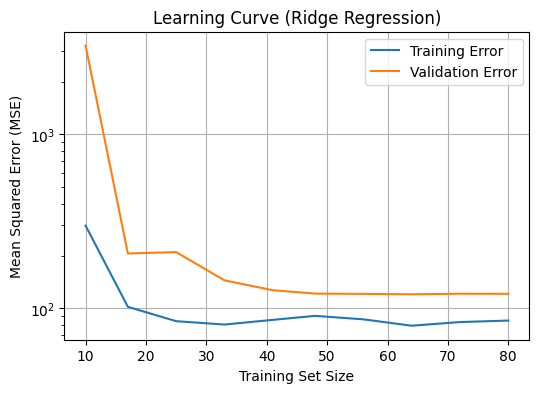

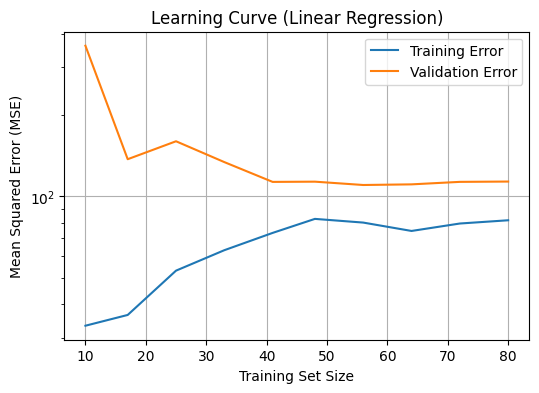

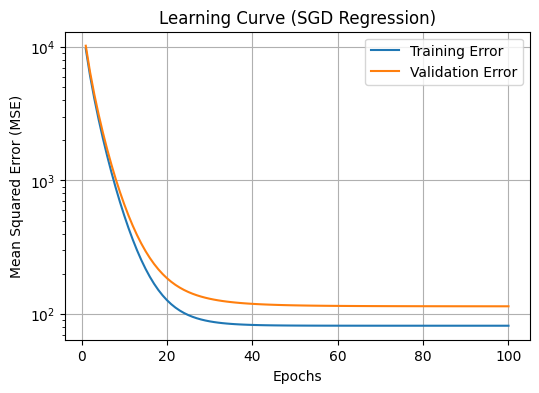

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_sizes = np.linspace(10, len(X_train), 10, dtype=int)
train_errors, val_errors = [], []

for size in train_sizes:
    model = Ridge(alpha=1.0)
    model.fit(X_train[:size], y_train[:size])
    train_errors.append(np.mean((model.predict(X_train[:size]) - y_train[:size])**2))
    val_errors.append(np.mean((model.predict(X_val) - y_val)**2))


# Plot learning curves
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, val_errors, label="Validation Error")
plt.yscale('log')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.title("Learning Curve (Ridge Regression)")
plt.grid(True)
plt.show()

#Create the Linear Regressor

train_errors, val_errors = [], []
for size in train_sizes:
    model = LinearRegression()
    model.fit(X_train[:size], y_train[:size])
    train_errors.append(np.mean((model.predict(X_train[:size]) - y_train[:size])**2))
    val_errors.append(np.mean((model.predict(X_val) - y_val)**2))


# Plot learning curves
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, val_errors, label="Validation Error")
plt.yscale('log')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.title("Learning Curve (Linear Regression)")
plt.grid(True)
plt.show()


#Create the SGD Regressor
model = SGDRegressor(warm_start=True, max_iter=1, tol=None, random_state=42)
n_epochs = 100
train_errors, val_errors = [], []


for epoch in range(n_epochs):
    model.partial_fit(X_train, y_train) # Train for one pass over the data
   
    # Predict and calculate error for the training set
    y_train_predict = model.predict(X_train)
    train_mse = np.mean((y_train_predict - y_train)**2)
    train_errors.append(train_mse)

    # Predict and calculate error for the validation set
    y_val_predict = model.predict(X_val)
    val_mse = np.mean((y_val_predict - y_val)**2)
    val_errors.append(val_mse)


# Plot the learning curves
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, n_epochs + 1), train_errors, label="Training Error")
plt.plot(np.arange(1, n_epochs + 1), val_errors, label="Validation Error")
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve (SGD Regression)")
plt.legend()
plt.grid(True)
plt.show()



**🗒️ Task:** Comment on your findings. 

✏️ **Answer:** 
All three models appear to be overfitting, as there is a clear difference between the validation and training errors. Ridge regression appears to approach the final best accuracy slighly faster.

_____

## Problem 4: Classification (8 points)

**🗒️ Task:** Load the penguins dataset. Train this model using the cross entropy loss function. 

Here is some starter code if you want to use it.

In [20]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Load Penguins dataset
penguins = sns.load_dataset("penguins").dropna()
penguins = penguins[penguins["species"] != "Gentoo"]  # Binary classification
X = penguins[["bill_length_mm", "bill_depth_mm"]].values
y = (penguins["species"] == "Adelie").astype(int)  # Convert to binary labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression with different regularization
alphas = [0.01, 0.1, 1, 10]
for alpha in alphas:
    model = LogisticRegression(C=1/alpha).fit(X_train, y_train)  # C = 1/alpha
    y_proba = model.predict_proba(X_val)[:, 1]
    loss = log_loss(y_val, y_proba)
    print(f"Log Loss (alpha={alpha}): {loss}")



Log Loss (alpha=0.01): 0.037209134724859094
Log Loss (alpha=0.1): 0.04014978511285508
Log Loss (alpha=1): 0.05504722554055582
Log Loss (alpha=10): 0.09330160082447331


**🗒️ Task:** Using the online documentation, describe how the cross entropy is regularized. What parameters do you need to pass to the library and what are useful values? 

✏️ **Answer:** 
In logistic regression, cross-entropy can be regularized using ridge, lasso, or elastic net (or no regularization). The parameters used in regularization would be "c", which determines the strength of the regularization. "11_ratio" is used only in elasticnet to determine the ratio of l1 to l2 regularization used. For SGDClassifier, the regularization strength is "alpha" instead of "C". 

**🗒️ Task:** Once the model is fit, visualize the probability functions you obtain and various decision boundaries. 

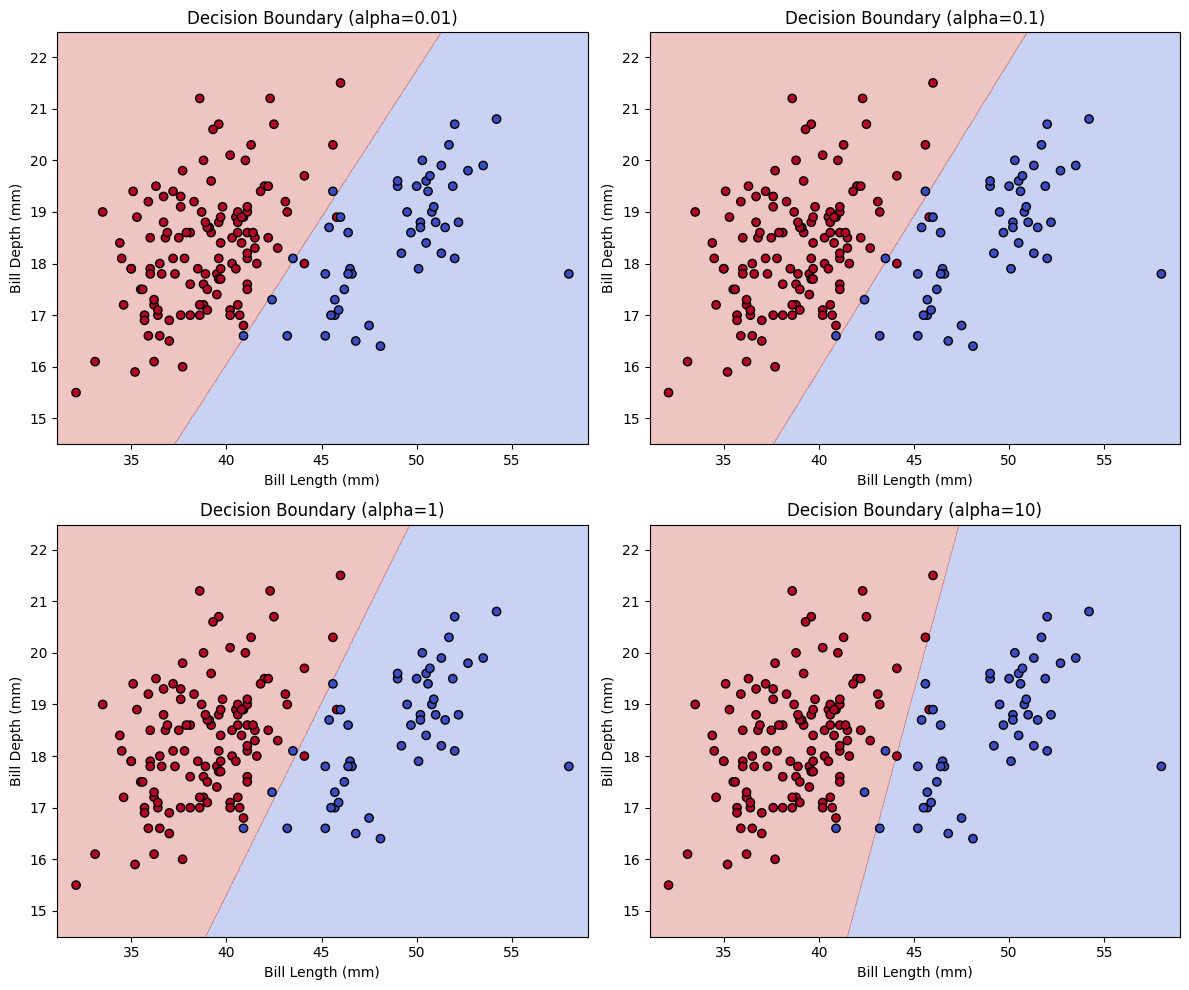

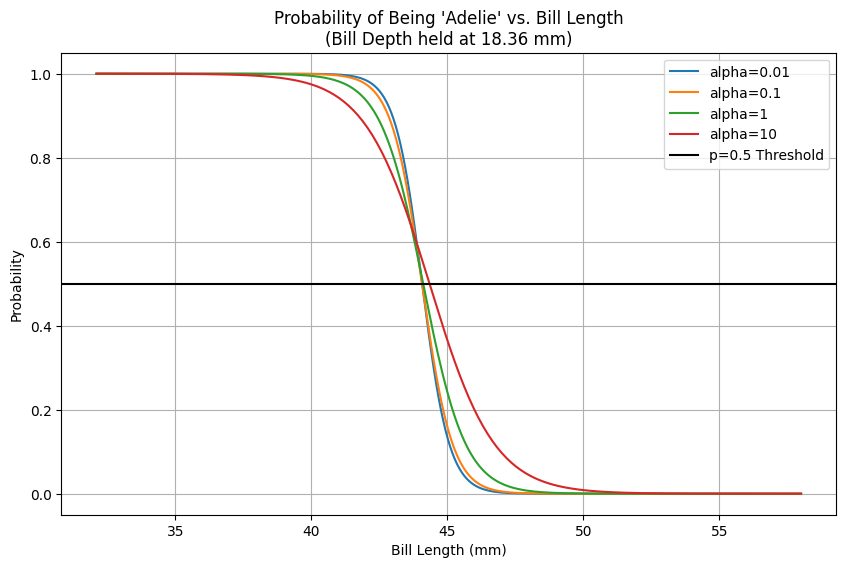

In [24]:
### ANSWER

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Set up plot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


for i, alpha in enumerate(alphas):
    # Fit the model
    model = LogisticRegression(C=1/alpha).fit(X_train, y_train)

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on every point of the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the regions and the data points
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(f"Decision Boundary (alpha={alpha})")
    ax.set_xlabel("Bill Length (mm)")
    ax.set_ylabel("Bill Depth (mm)")

plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

# Hold bill_depth constant at its mean value
mean_bill_depth = X_train[:, 1].mean()

# Create a range of values for bill_length
bill_length_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300)

for alpha in alphas:
    # Fit the model
    model = LogisticRegression(C=1/alpha).fit(X_train, y_train)

    # Create test points by varying bill_length and keeping bill_depth fixed
    X_test = np.c_[bill_length_range, np.full_like(bill_length_range, mean_bill_depth)]

    # Get the probability of Adelie
    y_proba = model.predict_proba(X_test)[:, 1]

    # Plot the probability curve
    plt.plot(bill_length_range, y_proba, label=f"alpha={alpha}")

# Add a horizontal line at the 0.5 decision threshold
plt.axhline(0.5, color='black', linestyle='-', label="p=0.5 Threshold")

plt.title(f"Probability of Being 'Adelie' vs. Bill Length\n(Bill Depth held at {mean_bill_depth:.2f} mm)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

### Step 2: Run All Cells

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.